In [2]:
import pandas as pd

data = pd.read_csv('happyscore_income.csv')

In [3]:
happy = data.happyScore
income = data.avg_income
satisfaction = data.avg_satisfaction
inequality = data.income_inequality
country = data.country

In [4]:
#4.1: Using the Pandas Library to Read csv Files
import matplotlib.pyplot as plt

plt.xlabel('Income')
plt.ylabel('Happiness')
plt.scatter(income, happy)

Text(0,0.5,'Happy score')

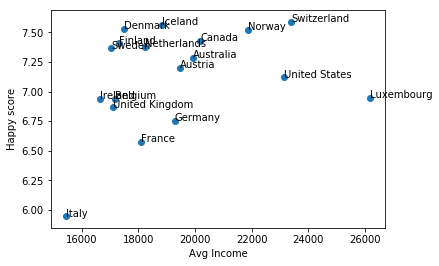

In [5]:
#4.1abc: Sorting and Filtering Data Using Pandas
import numpy as np

data.sort_values('avg_income', inplace=True)

richest = data[data['avg_income'] > 15000]

rich_mean = np.mean(richest['avg_income'])
all_mean = np.mean(data['avg_income'])

plt.scatter(richest['avg_income'], richest['happyScore'])
'''
[plt.text(richest.iloc[i]['avg_income'], 
         richest.iloc[i]['happyScore'], 
         richest.iloc[i]['country']) for i in range(richest.shape[0])]
'''

for k, row in richest.iterrows():
    plt.text(row['avg_income'], 
             row['happyScore'], 
             row['country'])

plt.xlabel('Avg Income')
plt.ylabel('Happy score')


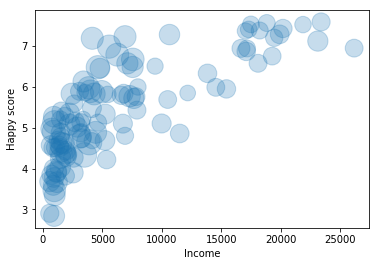

In [6]:
#4.2: Eyeballing the Data

plt.xlabel('Income')
plt.ylabel('Happy score')
plt.scatter(income, happy, s= inequality*10, alpha= 0.25)


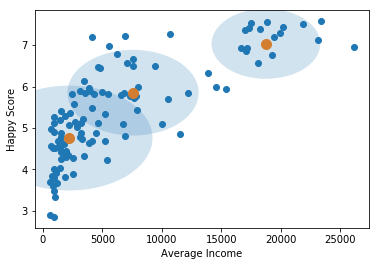

In [7]:
#4.3: Using K-Means to Interpret the Data
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.patches as patches

income_happy = np.column_stack((income, happy))

cluster_ammount = 3
km_res = KMeans(n_clusters= cluster_ammount).fit(income_happy)
clusters = km_res.cluster_centers_

fig, graph = plt.subplots()
graph.set_xlabel('Average Income')
graph.set_ylabel('Happy Score')
graph.scatter(income, happy)
graph.scatter(clusters[:, 0], clusters[:, 1], s = 100)

# make cluster map
cluster_map = pd.DataFrame()
cluster_map['data_index'] = data.index.values
cluster_map['cluster'] = km_res.labels_

#calculate std for each cluster
std_cluster = []
for i in range(cluster_ammount):
    indexes = cluster_map['data_index'][cluster_map.cluster == i].values
    std_cluster.append(np.std(income_happy[indexes], axis= 0))
    
#add the ellipses
for i, std in enumerate(std_cluster):
    ellipse = patches.Ellipse([clusters[i][0], clusters[i][1]], std[0]*2, std[1]*2, alpha = 0.2)
    graph.add_patch(ellipse)

#test for later
#std_cluster.append[np.std(income_happy[index], axis= 0) for index in cluster_map['data_index'][cluster_map.cluster == cl].values]

Burundi
Benin
Brazil
Switzerland
Costa Rica
Spain
Greece
Israel
Italy
Japan
Luxembourg
Mexico
Rwanda
Togo


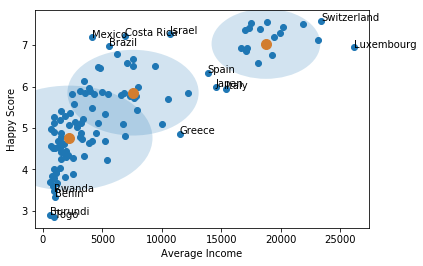

In [17]:
#Peer graded assignment (plot the outliers only)
import math

fig, graph = plt.subplots()
graph.set_xlabel('Average Income')
graph.set_ylabel('Happy Score')
graph.scatter(income, happy)
graph.scatter(clusters[:, 0], clusters[:, 1], s = 100)

#add the stf ellipses
for i, std in enumerate(std_cluster):
    ellipse = patches.Ellipse([clusters[i][0], clusters[i][1]], std[0]*2, std[1]*2, alpha = 0.2)
    graph.add_patch(ellipse)

#only plot the outlying countries
income_happy_country = np.column_stack((income_happy, country))
#print(income_happy_country)
for row in income_happy_country:
    out = 0
    for i, std_cl in enumerate(std_cluster):
        h, k = clusters[i]
        a, b = std_cl
        x = row[0]
        y = row[1]
        p = ((math.pow((x - h), 2) / math.pow(a, 2)) + (math.pow((y - k), 2) / math.pow(b, 2)))
        
        if p > 1:
            out += 1
        
    if out == cluster_ammount:
        graph.text(row[0], row[1], row[2])
        print(row[2])